In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("data.csv",encoding='latin-1')

In [3]:
df2=df.iloc[4:,1]
df2.head()
print(len(df2))

1095


In [4]:
temperture_list=[]
for i in range(len(df2)):
  temperture_list.append(float(df2.iloc[i]))
print(temperture_list)
print(len(temperture_list))

[2.5, 3.4, 2.7, 4.5, 4.7, 4.0, 5.0, 1.3, 2.1, 1.2, 0.9, 2.6, 4.5, 6.7, 5.1, 8.0, 5.4, 3.4, 2.9, 3.2, 3.3, 7.8, 5.5, 4.4, 7.3, 6.3, 9.8, 3.8, 5.0, 2.6, 4.0, 5.1, 7.4, 4.7, 6.0, 5.5, 7.9, 8.9, 5.2, 3.6, 4.8, 7.1, 6.7, 9.0, 11.0, 10.5, 10.9, 6.4, 3.7, 4.8, 8.6, 12.8, 13.7, 9.6, 5.6, 5.8, 7.6, 5.1, 5.6, 10.8, 13.7, 7.0, 8.2, 10.9, 13.0, 7.4, 6.5, 9.3, 10.8, 8.7, 11.7, 9.6, 11.3, 12.3, 13.4, 12.4, 10.8, 12.4, 13.1, 15.3, 11.4, 9.7, 12.5, 12.8, 13.0, 12.6, 15.9, 17.4, 17.4, 17.6, 16.3, 15.5, 16.4, 17.4, 12.7, 10.0, 12.6, 13.1, 10.7, 10.0, 11.7, 13.5, 14.9, 14.7, 10.8, 13.2, 14.2, 15.4, 14.5, 16.0, 18.9, 17.4, 13.7, 14.8, 15.5, 12.9, 13.8, 17.5, 16.7, 18.5, 16.7, 16.1, 15.5, 17.5, 17.7, 19.2, 17.2, 19.4, 22.4, 19.2, 16.9, 17.3, 15.6, 20.5, 21.0, 19.2, 22.9, 20.1, 17.0, 18.1, 21.2, 19.5, 19.0, 21.2, 22.1, 20.7, 16.4, 20.1, 22.6, 20.7, 20.0, 19.9, 21.2, 21.6, 20.9, 21.6, 21.4, 23.1, 24.0, 24.1, 23.4, 23.0, 22.7, 23.3, 21.5, 23.4, 20.9, 21.2, 21.9, 19.9, 23.0, 22.6, 22.9, 21.6, 21.9, 22.4, 23.9,

In [21]:
temperture_list2=temperture_list[0:365]
temperture_list3=temperture_list[365:730]
temperture_list4=temperture_list[730:]
temperture_list_list=[temperture_list2,temperture_list3,temperture_list4]

In [40]:
def run_plot_fig06(temp_list,where):
    """"
    実験設定パラメータ
    """

    r_mean_init = 0  # 報酬の平均の初期値（時間的に変動）
    r_std = 1  # 報酬の標準偏差（固定）
    tau = 1  # 報酬の平均の変動を規定するパラメータ（講義資料参照）
    lambda_ = 1.0  # 報酬の平均の変動を規定するパラメータ（講義資料参照）
    delta = 0.0  # 報酬の平均の変動を規定するパラメータ（講義資料参照）

    """
    強化学習エージェント
    """
    alpha = 0.2  # 学習率
    valRL = 0  # 価値の初期値
    valRL_data = []  # 価値の保存用

    """
    カルマン・フィルタエージェント
    """
    mu = 0  # 平均推定値の平均の初期値
    mu_data = []  # 平均推定値の平均の保存用
    var = 5  # 平均推定値の分散

    """
    シミュレーション
    """
    r_mean_data = []  # 報酬の平均の保存用
    r_mean = r_mean_init  # 報酬の平均（時間的に変動）

    for t in range(len(temp_list)):
        """
        報酬の発生
        """
        r=temp_list[t]

        """
        強化学習：RL
        """
        valRL_data.append(valRL)
        valRL = valRL + alpha * (r - valRL)

        """
        カルマン・フィルタ
        """
        mu_data.append(mu)
        mu = mu + (var / (var + r_std**2)) * (r - mu)  # 平均推定値の事後分布の平均
        var = (r_std**2 / (r_std**2 + var)) * var  # 平均推定値の事後分布の分散
        mu = lambda_ * mu + delta  # 報酬変動を考慮して事後分布を次回の事前分布に変換
        var = (lambda_**2) * var + tau**2  # 報酬変動を考慮して事後分布を次回の事前分布に変換

        """
        報酬の平均の変動
        """
        r_mean_data.append(r_mean)
        r_mean = lambda_ * r_mean + delta + np.random.normal(0, tau)

    """
    結果のプロット
    """
    
    plt.figure(1,figsize=(12,12))
    plt.subplot(3,1,where)
    plt.plot(temp_list, 'k-', linewidth=0.5, label='Reward mean')
    plt.plot(valRL_data, 'b-', linewidth=0.5, label='RL value')
    plt.plot(mu_data, 'r-', linewidth=0.5, label='Kalman filter estimate')
    plt.legend()
    plt.show()

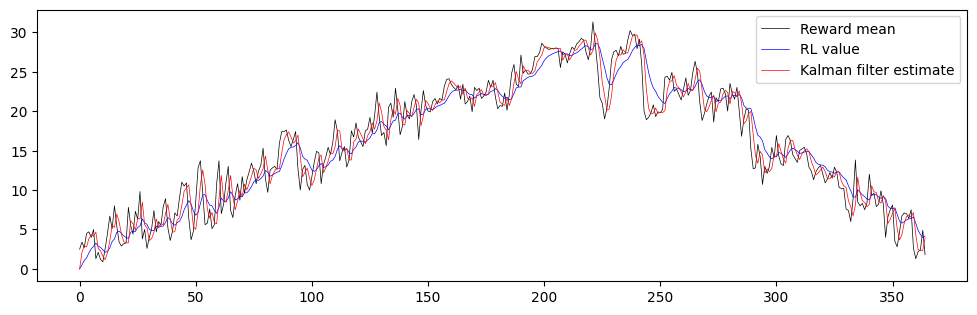

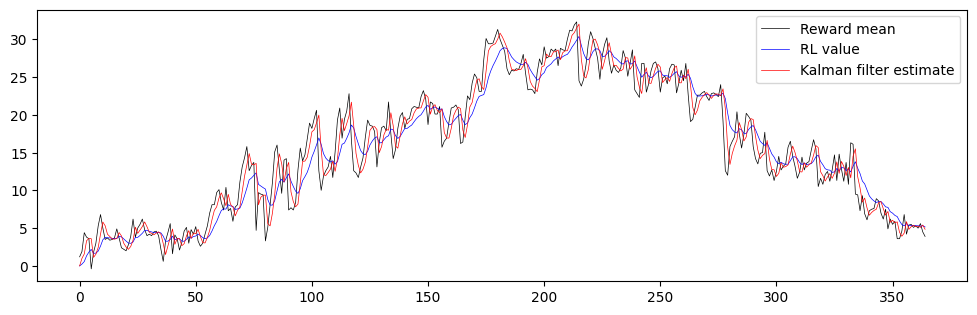

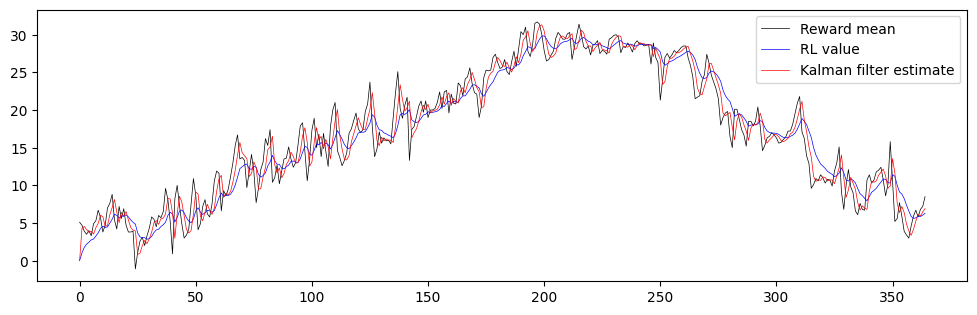

In [49]:
for i in range(3):
    run_plot_fig06(temperture_list_list[i],i+1)